<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. 

The main objective is to create a book recommendation system for users.

##Content

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

#Data Cleaning

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Books Dataset

In [2]:
# importing the dataset
books_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Books.csv')

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


* There are 271360 entries and 8 columns with columns Publisher, Book-Author and Image-URL-L having some Null Vlaues 

In [5]:
# dropping the Image URL columns from tha dataset 
books_df.drop(books_df[['Image-URL-L','Image-URL-M','Image-URL-S']],axis=1, inplace = True)

In [6]:
# checking for null values in Book-Author column
books_df.loc[(books_df['Book-Author'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [7]:
# filling the Null value in this column with 'other'
books_df.iloc[187689]['Book-Author']='other'

In [8]:
# checking for Null values in the Publisher column 
books_df.loc[(books_df['Publisher'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [9]:
# filling the null values in this column with 'other'
books_df['Publisher'].fillna('other',inplace=True)

In [10]:
books_df['Publisher'].isnull().sum()

0

In [11]:
# Let's explore 'Year of Publication' Column
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
len(books_df['Year-Of-Publication'].unique())

202

* There is some dicrepancy in the Year of Publication column as some entries have the year as '0', "DK Publishing Inc", "Gallimard", which does not make any sense. Also, we will have to treat the entries whose year is > 2004 as this dataset itself was published in 2004.

In [13]:
books_df[books_df['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


* Here the column Book-Author contains Year of Publication and Year of Publication column contains Publisher.

* Let's check if Author's name is mentioned in the title of book.

In [14]:
# checking for the Author's Name
books_df.iloc[209538]['Book-Title'], books_df.iloc[221678]['Book-Title']

('DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"')

In [15]:
# fixing all the values
books_df.iloc[209538]['Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.iloc[221678]['Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'


books_df.iloc[209538]['Book-Author']='Michael Teitelbaum'
books_df.iloc[221678]['Book-Author']='James Buckley'

books_df.iloc[209538]['Year-Of-Publication']=2000
books_df.iloc[221678]['Year-Of-Publication']=2000

books_df.iloc[209538]['Publisher']= 'DK Publishing Inc'
books_df.iloc[221678]['Publisher']= 'DK Publishing Inc'

In [16]:
# simillarly for 'Gallimard'
books_df[books_df['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [17]:
# checking for the Author's name
books_df.iloc[220731]['Book-Title']

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

In [18]:
# fixing all the values
books_df.iloc[220731]['Book-Title']='Peuple du ciel, suivi de \'Les Bergers'
books_df.iloc[220731]['Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.iloc[220731]['Year-Of-Publication']=2003
books_df.iloc[220731]['Publisher']= 'Gallimard'

In [19]:
# Rechecking
books_df.iloc[[220731,221678,209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc


In [20]:
books_df['Year-Of-Publication']= books_df['Year-Of-Publication'].astype('int64')

In [21]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [22]:
round(books_df['Year-Of-Publication'].median())

1995

In [23]:
# Let's replace the entries with year '0' or greater than 2004 with median year value
books_df.loc[(books_df['Year-Of-Publication'] > 2004) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()),inplace=True)

In [24]:
books_df['Year-Of-Publication'].isnull().sum()

0

In [25]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

* Now there are no null values...

###Users Dataset

In [26]:
users_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Users.csv')

In [27]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* This dataset consists of 3 features with 278858 entries with 'Age' column having Null Values.

In [29]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

* Here, the values below the age of 5 and above 100 do not make any sense hence we can replace them.

In [30]:
users_df.loc[(users_df['Age']<5) | (users_df['Age']>100), 'Age'] = np.NAN

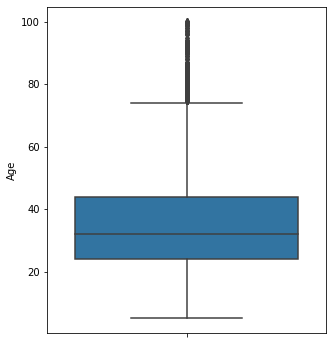

In [31]:
# Checking for Outliers in Age column
plt.figure(figsize=(5,6))
sns.boxplot(y=users_df['Age']);

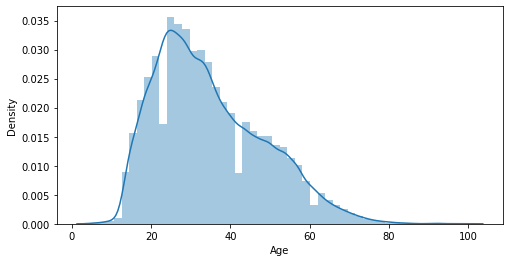

In [32]:
# distribution of Age column
plt.figure(figsize=(8,4))
sns.distplot(users_df['Age']);

* The feature Age is Rightly skewed. Replacing Null values with Median value

In [33]:
users_df['Age'].median()

32.0

In [34]:
users_df['Age'].fillna(users_df['Age'].median(),inplace=True)

In [35]:
users_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

* No Null values are present now....

In [36]:
# Let's Explore Location column
users_df['Location'][0:9]

0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
5         santa monica, california, usa
6                   washington, dc, usa
7              timmins, ontario, canada
8            germantown, tennessee, usa
Name: Location, dtype: object

* For the sake of simplicity, We can extract the Country from the Location column. 

In [37]:
for i in users_df:
    users_df['Country']=users_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [38]:
users_df

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",32.0,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",32.0,canada
278856,278857,"knoxville, tennessee, usa",32.0,usa


In [39]:
#drop location column
users_df.drop('Location',axis=1,inplace=True)

In [40]:
users_df['Country'].unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', nan, 'vietnam', 'sri lanka', 'pakistan', 'denmark',
       'belgium', 'malaysia', 'turkey', 'philippines', 'greece',
       'colombia', 'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan',
       'españa', 'sweden', 'argentina', 'nigeria', 'london', 'bulgaria',
       'austria', 'romania', 'singapore', 'albania', 'egypt', 'tunisia',
       'uzbekistan', 'qatar', 'syria', 'saudi arabia', 'indonesia',
       'sudan', 'somewherein space', 'poland', 'thailand', 'ireland',
       'venezuela', 'paraguay', 'mozambique', 'morocco', 'afghanistan',
       'estonia', 'clackamas', 'lesotho', 'yugoslavia', 'slovakia',
       'costa rica', 'basque country', 'ethiopia', 'croatia', 'israel',
       '

In [41]:
# Let's Replace some Misspelt Countries 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria',
                             'autralia','cananda','geermany','germay','italia','united kindgonm','united sates','united staes',
                             'united state','united states','us','urugua','indiai','canada eh','le canada'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia',
                            'canada','germany','germany','italy','united kingdom','usa','usa','usa','usa','usa',
                            'uruguay','india','canada','canada'],inplace=True)

In [42]:
# checking the null values
users_df.isnull().sum()

User-ID      0
Age          0
Country    368
dtype: int64

* Replacing the null values from country column with 'other' category.

In [43]:
users_df['Country'].fillna('other',inplace=True)

In [44]:
users_df.isnull().sum() 

User-ID    0
Age        0
Country    0
dtype: int64

###Ratings Dataset

In [45]:
ratings_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Ratings.csv')

In [46]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


* This Dataset consists 1149780 entries with 3 columns and no null values are present in it.

* Let's create a new dataset that consists of ratings for only those books that are present in our books_df dataset and for only those users who are present in our users dataset

In [48]:
ratings_df = ratings_df[ratings_df['ISBN'].isin(books_df['ISBN'])]
ratings_df = ratings_df[ratings_df['User-ID'].isin(users_df['User-ID'])]

In [49]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1031136 non-null  int64 
 1   ISBN         1031136 non-null  object
 2   Book-Rating  1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


* Some of the entries have been dropped

In [50]:
ratings_df['Book-Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

In [51]:
# entries with rating = 0
len(ratings_df[ratings_df['Book-Rating']==0])

647294

* Since the dataset contains explicit ratings (from 1 to 10) and implicit rating (0), let's divide the dataset into two parts

In [52]:
ratings_df_explicit = ratings_df[ratings_df['Book-Rating']!=0]
ratings_df_implicit = ratings_df[ratings_df['Book-Rating']==0]

#Final Dataset

In [53]:
# Create column Rating average 
ratings_df_explicit['Avg_Rating']=ratings_df_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

In [54]:
Final_df=users_df.copy()
Final_df=pd.merge(Final_df,ratings_df_explicit,on='User-ID')
Final_df=pd.merge(Final_df,books_df,on='ISBN')

In [55]:
Final_df.head(2)

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,32.0,canada,0002005018,5,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,32.0,other,0002005018,8,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


#EDA

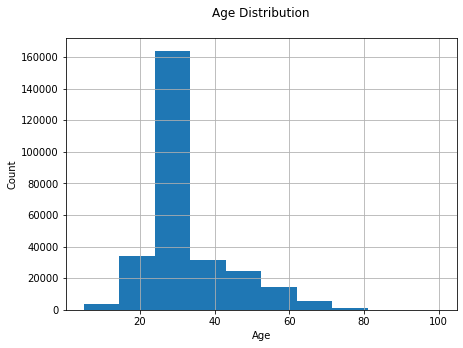

In [ ]:
# Age distribution
plt.figure(figsize=(7,5))
users_df['Age'].hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* Most users are from the age group of 20 to 40  

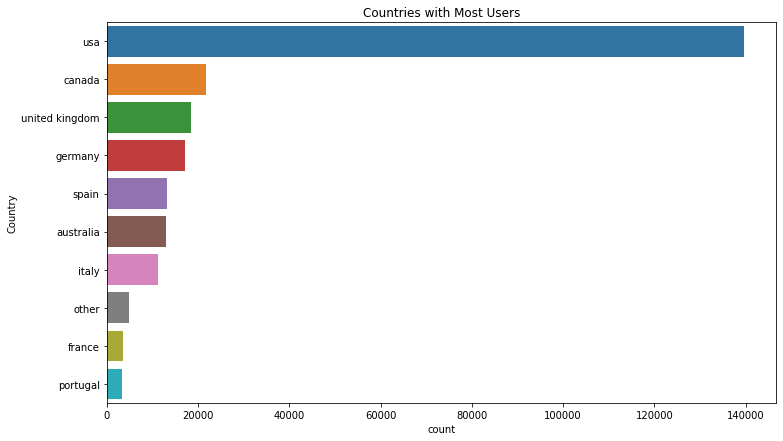

In [ ]:
# Top Publishers
plt.figure(figsize=(12,7))
sns.countplot(y='Country',data=users_df,order=pd.value_counts(users_df['Country']).iloc[:10].index)
plt.title('Countries with Most Users');

* Clearly, most of the users are from the USA, followed by Canada.

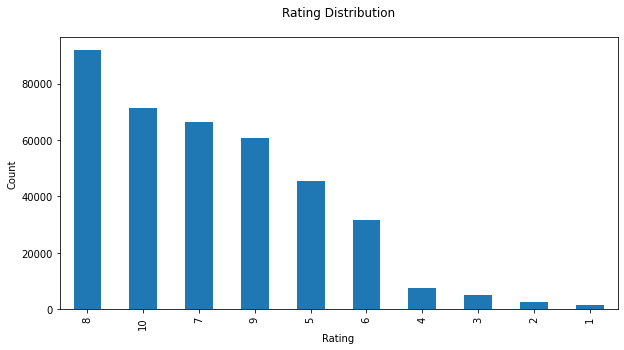

In [ ]:
# plotting ratings distribution for explicit ratings
plt.figure(figsize=(10,5))
ratings_df_explicit['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* The most common rating given by the users is 8, followed by 10.

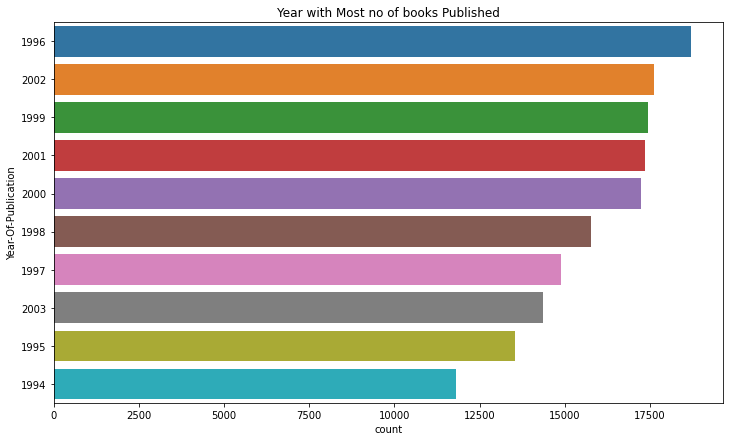

In [ ]:
# Published-Year
plt.figure(figsize=(12,7))
sns.countplot(y='Year-Of-Publication',data=books_df,order=pd.value_counts(books_df['Year-Of-Publication'].astype('int64')).iloc[:10].index)
plt.title('Year with Most no of books Published');

* The year in which most no of books were published in this dataset is  1996 followed by Year 2002.

In [ ]:
# The most popular books among users
Final_df.groupby(['Book-Title','Book-Author','Year-Of-Publication'])['Book-Rating'].count().nlargest(10).reset_index()

,Book-Title,Book-Author,Year-Of-Publication,Book-Rating
0,The Lovely Bones: A Novel,Alice Sebold,2002.0,707
1,Wild Animus,Rich Shapero,2004.0,581
2,The Da Vinci Code,Dan Brown,2003.0,488
3,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,383
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,320
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,315
6,The Summons,John Grisham,2002.0,308
7,The Secret Life of Bees,Sue Monk Kidd,2003.0,307
8,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,295
9,A Painted House,John Grisham,2001.0,284


* The book "The Lovely Bones: A Novel" by Alice Sebold,published in the year 2002, received the highest number of ratings.

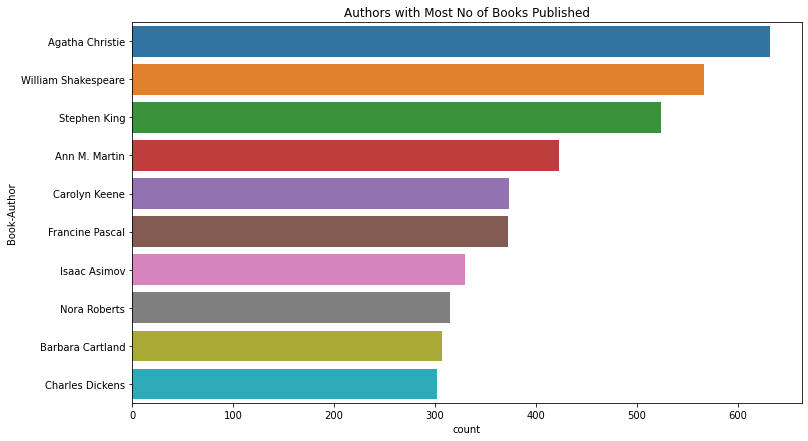

In [ ]:
# Top Authors
plt.figure(figsize=(12,7))
sns.countplot(y='Book-Author',data=books_df,order=pd.value_counts(books_df['Book-Author']).iloc[:10].index);
plt.title('Authors with Most No of Books Published');

* Agatha Christie is the Author with most no of books Published  followed by William Shakespeare and Stephen king. 

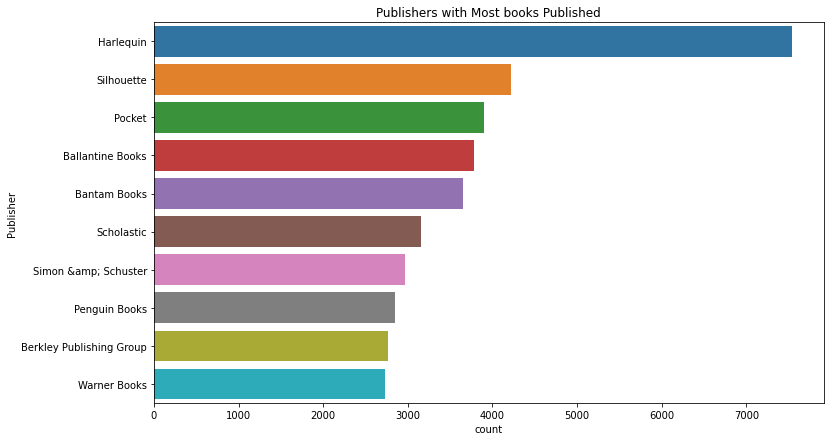

In [ ]:
# Top Publishers
plt.figure(figsize=(12,7))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:10].index)
plt.title('Publishers with Most books Published');

* Harlequin is the Publisher with most no of books published followed by Silhouette.

#Collaberative Filtering (Item-Item Based)


In [57]:
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [58]:
Final_train_df, Final_test_df = train_test_split(Final_df, 
                                   test_size=0.20,
                                   random_state=42)

print('# Train set: %d' % len(Final_train_df))
print('# Test set: %d' % len(Final_test_df))

# Train set: 307073
# Test set: 76769


In [59]:
Final_train_df

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
124267,110934,46.0,usa,0393325172,6,6.300000,Master and Commander (Movie Tie-In Edition),Patrick O'Brian,2003.0,W.W. Norton &amp; Company
375882,252222,21.0,canada,0920236677,8,8.000000,Barnaby and Mr. Ling,Allen Morgan,1984.0,Firefly Books
43900,2406,48.0,germany,3442440246,3,3.000000,Potsdamer Ableben.,Pieke Biermann,1998.0,Goldmann
272697,81560,32.0,new zealand,0345348680,8,7.000000,The Wounded Land (The Second Chronicles of Tho...,Stephen R. Donaldson,1995.0,Del Rey Books
184155,23902,32.0,united kingdom,1842320645,7,7.000000,Sober As a Judge,Henry Cecil,2000.0,House of Stratus
...,...,...,...,...,...,...,...,...,...,...
259178,260067,32.0,usa,0451151224,5,6.666667,The Running Man,Stephen King,1987.0,Signet Book
365838,227520,33.0,usa,0812532848,9,9.000000,The Birth of Flux &amp; Anchor,Jack L. Chalker,1992.0,Tor Books
131932,132836,57.0,usa,0515107867,10,8.117647,The Cat Who Knew a Cardinal,Lilian Jackson Braun,1995.0,Jove Books
146867,11993,37.0,usa,1556610599,8,8.000000,Spring's Gentle Promise (Seasons of the Heart ...,Janette Oke,1989.0,Bethany House


In [60]:
user_ratings_threshold = 3

filter_users = Final_train_df['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = Final_train_df[Final_train_df['User-ID'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 256710


In [61]:
df_ratings_top

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
124267,110934,46.0,usa,0393325172,6,6.300000,Master and Commander (Movie Tie-In Edition),Patrick O'Brian,2003.0,W.W. Norton &amp; Company
375882,252222,21.0,canada,0920236677,8,8.000000,Barnaby and Mr. Ling,Allen Morgan,1984.0,Firefly Books
43900,2406,48.0,germany,3442440246,3,3.000000,Potsdamer Ableben.,Pieke Biermann,1998.0,Goldmann
272697,81560,32.0,new zealand,0345348680,8,7.000000,The Wounded Land (The Second Chronicles of Tho...,Stephen R. Donaldson,1995.0,Del Rey Books
184155,23902,32.0,united kingdom,1842320645,7,7.000000,Sober As a Judge,Henry Cecil,2000.0,House of Stratus
...,...,...,...,...,...,...,...,...,...,...
259178,260067,32.0,usa,0451151224,5,6.666667,The Running Man,Stephen King,1987.0,Signet Book
365838,227520,33.0,usa,0812532848,9,9.000000,The Birth of Flux &amp; Anchor,Jack L. Chalker,1992.0,Tor Books
131932,132836,57.0,usa,0515107867,10,8.117647,The Cat Who Knew a Cardinal,Lilian Jackson Braun,1995.0,Jove Books
146867,11993,37.0,usa,1556610599,8,8.000000,Spring's Gentle Promise (Seasons of the Heart ...,Janette Oke,1989.0,Bethany House


In [62]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 120449


In [63]:
ratings_matrix = df_ratings_top.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

In [64]:
print(ratings_matrix.shape)
ratings_matrix.head()

(15703, 11662)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,000648302X,000649840X,0006511767,0006546684,0006547834,0006550576,0006550789,0006550924,0006551971,0006742939,0007110928,0007122039,0007141076,0007154615,000716226X,0020125305,0020198817,0020198906,0020199600,002026478X,0020306652,0020360754,002040400X,0020418809,0020427859,0020442009,0020442106,0020442203,0020442300,0020442408,0020442505,0020442602,0020446500,0020449313,0020518501,...,8440694539,8445071408,8445071416,8445071769,8445071777,8466303022,8466303316,846630679X,8472230082,8472236552,8472237966,8477204055,8478447229,8478884459,8478884955,8478885196,8478886451,8483101610,8483140004,8484602508,8495359537,8495501074,8495501090,8495501198,8495501465,849550152X,8495501651,8495618605,8806142100,8806143042,880781210X,8807813025,8817106100,8845205118,9129622425,950491036X,958704049X,9681500954,9722016563,9871138148
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df_ratings_top = df_ratings_top.drop_duplicates(['User-ID', 'Book-Title'])  

In [66]:
ratings_matrix_new = df_ratings_top.pivot(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

In [67]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric ='cosine', algorithm ='brute')

model_knn.fit(ratings_matrix_new)

NearestNeighbors(algorithm='brute', metric='cosine')

In [68]:
query_index = np.random.choice(ratings_matrix_new.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(ratings_matrix_new.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

8294


In [69]:
ratings_matrix_new.index[query_index]

'The Last Book in the Universe'

In [70]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(ratings_matrix_new.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, ratings_matrix_new.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Last Book in the Universe:

1: Deep Wizardry: The Second Book in the Young Wizards Series, with distance of 0.6763583506661202:
2: Finding God in the Lord of the Rings, with distance of 0.7561969162579614:
3: London: The Novel82, with distance of 0.7644353305602096:
4: The Naked Sun, with distance of 0.766683516693121:
5: Hometown Tales, with distance of 0.7670753162698274:


#Collaberative Filtering (User-Item Based)


In [71]:
users_interactions_count_df = ratings_df_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print(f'# of users:', len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 200].reset_index()[['User-ID']]
print('# of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 100 interactions: 118


In [72]:
users_with_enough_interactions_df

,User-ID
0,4385
1,6251
2,6575
3,7346
4,11676
...,...
113,265115
114,265889
115,269566
116,270713


In [235]:
users_interactions_count_df[users_interactions_count_df >= 100]

User-ID
2033      129
2110      103
2276      196
4017      154
4385      212
         ... 
274061    211
274301    161
275970    142
277427    146
278418    106
Length: 449, dtype: int64

In [73]:
print('# of interactions: %d' % len(ratings_df_explicit))
interactions_from_selected_users_df = ratings_df_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 58174


In [74]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating
0,4385,0061083402,10,7.500000
1,4385,0061093343,9,7.818182
2,4385,0061096156,10,10.000000
3,4385,0312956762,10,10.000000
4,4385,0312980353,10,8.666667
5,4385,0345446100,10,8.666667
6,4385,0373024665,10,10.000000
7,4385,0373025920,10,10.000000
8,4385,0373032072,10,10.000000
9,4385,0373035101,10,10.000000


In [75]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 58174


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 46539
# interactions on Test set: 11635


In [78]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
13011,0373259522,69697,3.459432
54188,1565120299,16795,3.000000
49859,0879011343,135149,3.000000
37138,0671673661,31315,3.321928
37219,0671686151,6575,3.321928


In [79]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df

ISBN,0000913154,0001046438,0001047213,0001047973,0001048082,0001053736,0001053744,0001056107,0001944711,0001952803,0001953877,0002158973,0002176181,0002176432,0002181924,0002184974,000223257X,0002233509,0002239183,0002241358,000225056X,0002250810,0002251485,0002251760,0002252376,0002253372,0002255014,0002255081,0002258560,0002316196,0002325780,0002550563,0002551675,0002553384,0002554283,0002726874,000433549X,0004356373,0004588010,0004588177,...,9583004448,9622174183,9626347422,9631302199,9631367010,9679785904,968150271X,9681603206,9681905202,9681908244,9682105331,968390419X,9684110545,9684323158,970050431X,9700509052,9722107755,9722212397,972802844X,9728128045,9729484309,9812180060,9879397274,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9997405137,9997409728,9997411757,9997507002,999750805X,9997555635,B00005TZWI,B00007FYKW,B0000DYXID,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.807355,0.0,0.0,0.0,0.0,2.584963,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.169925,0.0,0.0,0.0,3.169925,0.0,3.169925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.584963,3.0,0.0,0.0,2.584963,3.0,0.0,0.0,0.0,0.0,2.807355,0.0,3.169925,0.0,3.0,2.584963,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.459432,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
265889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [80]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[4385, 6251, 6575, 7346, 11676, 13552, 16634, 16795, 23768, 23872]

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [84]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [85]:
users_items_pivot_matrix.shape

(118, 36875)

In [86]:
U.shape


(118, 15)

In [87]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [88]:
Vt.shape

(15, 36875)

In [89]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-0.00151118, -0.00054548, -0.00054548, ...,  0.00052664,
         0.00436546,  0.00102754],
       [ 0.01853014,  0.01051998,  0.01051998, ...,  0.00708874,
         0.01298935,  0.00854806],
       [ 0.01635195,  0.01620714,  0.01620714, ...,  0.01021813,
         0.02156134,  0.01403418],
       ...,
       [-0.00199006,  0.00250334,  0.00250334, ...,  0.00393171,
         0.00051788,  0.00457112],
       [ 0.0006081 ,  0.01285305,  0.01285305, ...,  0.00648319,
         0.01236179,  0.00852344],
       [-0.00032415, -0.00355214, -0.00355214, ...,  0.00744993,
         0.00132139,  0.00923583]])

In [90]:
all_user_predicted_ratings.shape

(118, 36875)

In [91]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,4385,6251,6575,7346,11676,13552,16634,16795,23768,23872,23902,25409,25981,30276,30511,31315,31556,31826,35859,36606,37950,38273,43246,46398,51883,55490,56399,56959,60244,60707,63714,68555,69078,69697,75591,76499,76626,78553,78973,79441,...,171118,172742,174304,177432,177458,182085,185233,189334,189835,190925,197659,200226,204864,212965,216012,216683,217740,225087,225763,230522,234828,235105,236283,240144,242006,248718,249894,252695,254206,254899,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000913154,-0.001511,0.018530,0.016352,0.031114,-0.002522,-0.005836,0.038417,-0.002414,0.007497,-0.001886,-0.003041,0.001090,-0.000908,-0.006865,0.004815,0.018232,0.015692,-0.017494,-0.010404,-0.004397,0.021526,0.021587,0.005253,0.006594,-0.002093,-0.006833,-0.004191,0.028568,0.026003,0.021765,0.011928,-0.001536,-0.020142,-0.010091,0.005141,-0.000259,0.062058,-0.001616,0.042314,0.047768,...,3.148639,-0.003259,-0.002265,0.016877,0.054777,-0.019172,0.022571,0.016073,-0.001086,-0.001575,-0.003006,0.000078,-0.020000,-0.002679,-0.005967,-0.001967,-0.002930,0.002868,0.001337,0.029526,-0.001686,-0.001066,-0.006117,0.036539,-0.007175,-0.006940,0.008322,0.017895,0.014730,0.018046,0.097550,0.001921,-0.002926,0.003471,0.046281,-0.003242,-0.000726,-0.001990,0.000608,-0.000324
0001046438,-0.000545,0.010520,0.016207,0.007773,-0.001858,0.008501,0.005875,-0.004113,0.002224,0.003971,3.317503,0.002885,-0.003551,0.010528,0.018799,-0.002592,0.007137,0.002993,-0.002226,0.005175,0.021881,-0.002330,0.010484,0.023578,0.007747,-0.005403,-0.001764,0.004362,-0.005415,0.002372,-0.000380,0.020040,0.020351,-0.003589,-0.003774,-0.001361,0.045954,-0.002925,0.042506,-0.000756,...,-0.003186,-0.002587,0.005405,0.016052,-0.003536,0.006192,-0.003097,-0.003157,-0.000713,0.000889,-0.001699,0.014184,0.007185,-0.000761,-0.002507,0.014397,0.013712,0.000538,0.001656,0.003646,0.002320,-0.001246,-0.004088,0.001888,-0.002466,-0.001559,-0.003095,-0.002054,0.002785,-0.000779,-0.009576,0.002578,0.009156,0.020685,0.001679,0.006379,-0.002961,0.002503,0.012853,-0.003552
0001047213,-0.000545,0.010520,0.016207,0.007773,-0.001858,0.008501,0.005875,-0.004113,0.002224,0.003971,3.317503,0.002885,-0.003551,0.010528,0.018799,-0.002592,0.007137,0.002993,-0.002226,0.005175,0.021881,-0.002330,0.010484,0.023578,0.007747,-0.005403,-0.001764,0.004362,-0.005415,0.002372,-0.000380,0.020040,0.020351,-0.003589,-0.003774,-0.001361,0.045954,-0.002925,0.042506,-0.000756,...,-0.003186,-0.002587,0.005405,0.016052,-0.003536,0.006192,-0.003097,-0.003157,-0.000713,0.000889,-0.001699,0.014184,0.007185,-0.000761,-0.002507,0.014397,0.013712,0.000538,0.001656,0.003646,0.002320,-0.001246,-0.004088,0.001888,-0.002466,-0.001559,-0.003095,-0.002054,0.002785,-0.000779,-0.009576,0.002578,0.009156,0.020685,0.001679,0.006379,-0.002961,0.002503,0.012853,-0.003552
0001047973,-0.000545,0.010520,0.016207,0.007773,-0.001858,0.008501,0.005875,-0.004113,0.002224,0.003971,3.317503,0.002885,-0.003551,0.010528,0.018799,-0.002592,0.007137,0.002993,-0.002226,0.005175,0.021881,-0.002330,0.010484,0.023578,0.007747,-0.005403,-0.001764,0.004362,-0.005415,0.002372,-0.000380,0.020040,0.020351,-0.003589,-0.003774,-0.001361,0.045954,-0.002925,0.042506,-0.000756,...,-0.003186,-0.002587,0.005405,0.016052,-0.003536,0.006192,-0.003097,-0.003157,-0.000713,0.000889,-0.001699,0.014184,0.007185,-0.000761,-0.002507,0.014397,0.013712,0.000538,0.001656,0.003646,0.002320,-0.001246,-0.004088,0.001888,-0.002466,-0.001559,-0.003095,-0.002054,0.002785,-0.000779,-0.009576,0.002578,0.009156,0.020685,0.001679,0.006379,-0.002961,0.002503,0.012853,-0.003552
0001048082,-0.000521,0.010039,0.015466,0.007417,-0.001773,0.008112,0.005607,-0.003925,0.002122,0.003789,3.165702,0.002753,-0.003389,0.010046,0.017939,-0.002474,0.006810,0.002856,-0.002124,0.004939,0.020880,-0.002223,0.010004,0.022499,0.007393,-0.005156,-0.001684,0.004163,-0.005167,0.002263,-0.000363,0.01912

In [92]:
global books_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [93]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df

cf_recommender_model = CFRecommender(cf_preds_df)


In [94]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [95]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [96]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_df_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [100]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 23902, 189835, 189835, 93047, 95359, 56399, 11676, 69078, 63714, 11676, 11676, 262998, 23902, 63714, 11676, 189835, 11676, 63714, 30511, 189334, 189334, 23902, 101851, 11676, 11676, 123883, 23902, 23902, 11676, 189334, 11676, 11676, 30511, 225087, 172742, 16634, 88733, 264321, 189334, 11676, 63714, 30511, 76626, 248718, 76626, 56399, 270713, 168245, 168245, 23902, 63714, 107784, 168245, 35859, 177458, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 11676, 242006, 225087, 11676, 11676, 30511, 189835, 11676, 11676, 23902, 76626, 11676, 63714, 23902, 189334, 105517, 200226, 11676, 37950, 225087, 225087, 11676, 11676, 11676, 11676, 190925, 11676, 81560, 197659, 11676, 189334, 11676, 30511, 171118, 23902, 78973, 11676, 262998, 93047, 23902, 23902, 11676, 76626, 94347, 23902, 11676, 11676, 11676, 60707, 56399, 76626, 11676, 23902, 43246, 56399, 56399, 56399, 56399, 56399, 76626, 11676, 56399, 11676, 262998, 270713, 11676, 23902, 23902, 56399, 262998, 1

In [101]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  171118
Recommendation for User-ID =  171118
         ISBN                                         Book-Title  recStrength
0  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...     0.272889
1  0345350499                                The Mists of Avalon     0.237337
2  0836217632      The Curse of Madame C : A Far Side Collection     0.213249
3  0440168899                                     Ruling Passion     0.197789
4  015602943X            The Time Traveler's Wife (Harvest Book)     0.192483
5  0439064872   Harry Potter and the Chamber of Secrets (Book 2)     0.184113
6  0312306326                             Visions of Sugar Plums     0.180320
7  0345362861                                        Dragonsdawn     0.175533
8  0441304834  Guilty Pleasures (Anita Blake Vampire Hunter (...     0.175192
9  0345335708         Castle of Wizardry (The Belgariad, Book 4)     0.174597


In [102]:
import random

In [103]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_df_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [104]:
len(cf_preds_df.columns)

118

In [105]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
117 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.18160721959604642, 'recall@10': 0.24228620541469703}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
25,219,295,1389,0.157667,0.212383,11676
6,136,185,1138,0.119508,0.162566,98391
23,17,21,380,0.044737,0.055263,189835
31,73,82,369,0.197832,0.222222,153662
29,19,22,236,0.080508,0.093220,23902
9,22,60,204,0.107843,0.294118,235105
26,14,19,203,0.068966,0.093596,76499
17,27,40,193,0.139896,0.207254,171118
1,40,49,192,0.208333,0.255208,16795
28,21,31,188,0.111702,0.164894,248718
